**CSI 4142 Data Science** <br/>
*Assignment 1: Dataset Insights*

# Identification

Name: Eli Wynn<br/>
Student Number: 300248135

Name: Jack Snelgrove<br/>
Student Number: 300247435


Our datasets have been uploaded from the public repository:

- [github.com/eli-wynn/Datasets](https://github.com/eli-wynn/Datasets)

# Introduction

The goal of this report is to perform data analysis on a heart attack database and student placement dataset. The audience would be the general public wanting to learn about factors that could lead to a heart attack and students/educators wanting to examine student results after graduation respectively.

Imports:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Datasets

In [ ]:
heart  = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/placementdata.csv"
placement = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/placementdata.csv"
heartData = pd.read_csv(heart)
placementData = pd.read_csv(placement)

# Dataset Descriptions
## [Placement Data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)
Author: RK <br>
Purpose: This dataset contains information about the students academic and training and placement status<br>
Shape: Columns: 12, Rows: 10000<br>
## [Heart Data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
Author: fedesoriano <br>
Purpose:<br>
Shape: Columns: 12, Rows: 10000<br>

## Placement Insight

1. How many student who were surveyed got Placed vs Not placed?

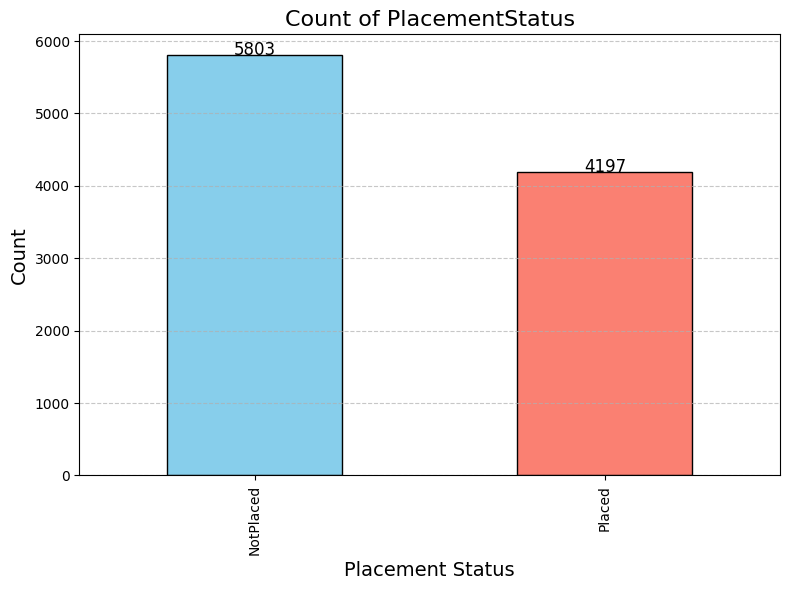

In [18]:
#Creates a pandas Series that represnts the count of students who are Placed vs NotPlaced
status_counts = placementData['PlacementStatus'].value_counts()

#Define the figure size
plt.figure(figsize=(8, 6))

#Creates a bar chart with the status_counts Series
status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Count of PlacementStatus', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add the exact count on top of each bar
plt.text(1, status_counts['Placed'] + 1, f"{status_counts['Placed']}", ha='center', fontsize=12)
plt.text(0, status_counts['NotPlaced'] + 1, f"{status_counts['NotPlaced']}", ha='center', fontsize=12)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Insight #1: Based on the chart above, ~58% of the students who were surveyed were placed in internships <br><br>
2. Did the number of completed internships effect the number of students who got placed? 